<b>177312 - Tales Lelo da Aparecida</b>

Ajustaremos uma função cúbica (f(x) = ax^3 + bx^2 + cx + d) aos dados, minimizando o erro quadrático, assumindo os valores:

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = [-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
y = [-53.9, -28.5, -20.7, -3.6, -9.8, 5.0, 4.2, 5.1, 11.4, 27.4, 44.0]

def f(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

# Função padrão para plotar a função encontrada e os pontos originais
def plotar(a,b,c,d):
    t1 = np.arange(-6.0, 6.0, 0.1) 
    plt.figure(figsize=[7,3])
    plt.axis([-6, 6, -60, 50])
    plt.grid(True)
    pp = plt.plot(x,y,'ro') # Plota os pontos conhecidos passados
    pf = plt.plot(t1,f(t1,a,b,c,d)) # Plota a função com os coeficientes calculados
    

### Implemente uma decida do gradiente (escreva explicitamente o código para a função que computa o gradiente). Use um learning rate the *1.0e-5*, inicie do ponto *a=b=c=d=0*, e rode *50* iterações.  Qual a solução encontrada? Qual o erro na solução? Plote a função com os valores solução em conjunto com os dados.

Solução: f(x) = +0.40582178*x^3 -0.15346867*x^2 +0.05946159*x -0.00842238
Soma dos Erros Quadrados: 224.107804


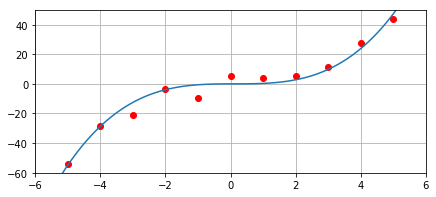

In [2]:
# Função a ser minimizada
def sqrSum(v):
    a,b,c,d = v[0],v[1],v[2],v[3]
    total = 0
    for xi,yi in zip(x,y):
        total += (yi - f(xi,a,b,c,d))**2
    return total

# Gradiente da Função 
def grad(v):
    a,b,c,d = v[0],v[1],v[2],v[3]
    da,db,dc,dd = 0,0,0,0
    for xi,yi in zip(x,y):
        difXY = (f(xi,a,b,c,d) - yi)
        da += 2 * difXY * xi**3 #d/da (sqrSum)
        db += 2 * difXY * xi**2 #d/db (sqrSum)
        dc += 2 * difXY * xi**1 #d/dc (sqrSum)
        dd += 2 * difXY         #d/dd (sqrSum)
    return da,db,dc,dd

lr = 1e-5
def gradDesc(a,b,c,d):
    for i in range(50):
        da,db,dc,dd = grad([a,b,c,d])
        a -= lr*da
        b -= lr*db
        c -= lr*dc
        d -= lr*dd
    return a,b,c,d

a,b,c,d = gradDesc(0,0,0,0) # Cálculo dos coeficientes

print('Solução: f(x) = {:+.8f}*x^3 {:+.8f}*x^2 {:+.8f}*x {:+.8f}'.format(a, b, c, d))
print('Soma dos Erros Quadrados: {:f}'.format(sqrSum([a,b,c,d])))

plotar(a,b,c,d)

### Use a descida do gradiente com learning rate de *1.0e-4*. O que aconteceu?

Solução: f(x) = -3.55918263E+42*x^3 +8.03113601E+24*x^2 -1.69916825E+41*x -2.78549698E+23
Soma dos Erros Quadrados: 5.22130488E+89


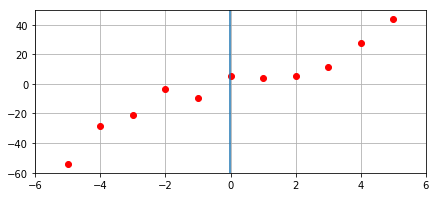

In [4]:
lr = 1.0e-4

a,b,c,d = gradDesc(0,0,0,0) # Calculo dos coeficientes

print('Solução: f(x) = {:+.8E}*x^3 {:+.8E}*x^2 {:+.8E}*x {:+.8E}'.format(a, b, c, d))
print('Soma dos Erros Quadrados: {:.8E}'.format(sqrSum([a,b,c,d])))

plotar(a,b,c,d)

Como pode ser percebido pelo gráfico e pelos valores encontrados para erro e para o modelo, a taxa 1.0e-4 leva ao crescimento infinito dos coeficientes, claramente fugindo ao mínimo procurado, o que indica um *learning rate* alto demais.

### Use o método de BFGS do scipy.optimize.minimize. Use o BFGS sem jacobiano (o método vai computar o Jacobiano usando diferenças finitas) De novo, imprima a solução, o erro e plote a função encontrada e os dados originais. Quantas iterações foram precisas?

Solução: f(x) = +0.29123927*x^3 -0.17995339*x^2 +2.45957734*x +0.03589747
Soma dos Erros Quadrados: 127.565070
Número de iterações: 7


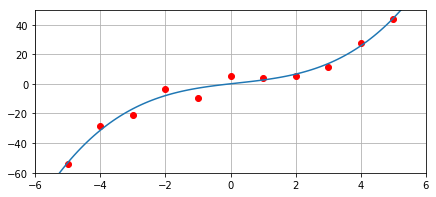

In [6]:
from scipy.optimize import minimize

minRes = minimize(sqrSum, [0,0,0,0], method='BFGS')

a,b,c,d = minRes['x']

print('Solução: f(x) = {:+.8f}*x^3 {:+.8f}*x^2 {:+.8f}*x {:+.8f}'.format(a, b, c, d))
print('Soma dos Erros Quadrados: {:f}'.format(sqrSum([a,b,c,d])))
print('Número de iterações: {:d}'.format(minRes['nit']))

plotar(a,b,c,d)

### Use o método de BFGS do scipy.optimize.minimize. Use o Jacobiano. Houve diferença entre a solução anterior? Mesmo número de chamadas para a função?

Solução: f(x) = +0.29123932*x^3 -0.17995338*x^2 +2.45957653*x +0.03589744
Soma dos Erros Quadrados: 127.565070
Número de iterações: 7


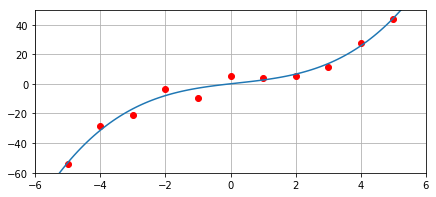

In [7]:
# Casca para o gradiente retornar o tipo esperado pelo TensorFlow
def gradArray(v):
    return np.asarray(grad(v))

minRes = minimize(sqrSum, [0,0,0,0], method='BFGS',jac=gradArray)

a,b,c,d = minRes['x']

print('Solução: f(x) = {:+.8f}*x^3 {:+.8f}*x^2 {:+.8f}*x {:+.8f}'.format(a, b, c, d))
print('Soma dos Erros Quadrados: {:f}'.format(sqrSum([a,b,c,d])))
print('Número de iterações: {:d}'.format(minRes['nit']))

plotar(a,b,c,d)

### Use o método Nelder Mead do scipy.optimize.minimize. Imprima e plote. Quantas interações?

Solução: f(x) = +0.29124112*x^3 -0.17995509*x^2 +2.45954951*x +0.03587784
Soma dos Erros Quadrados: 127.565070
Número de iterações: 360


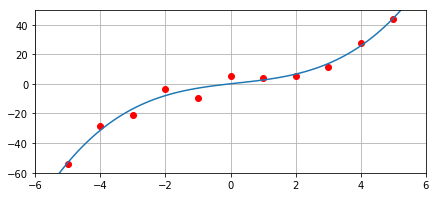

In [8]:
minRes = minimize(sqrSum, [0,0,0,0], method='Nelder-Mead')

a,b,c,d = minRes['x']

print('Solução: f(x) = {:+.8f}*x^3 {:+.8f}*x^2 {:+.8f}*x {:+.8f}'.format(a, b, c, d))
print('Soma dos Erros Quadrados: {:f}'.format(sqrSum([a,b,c,d])))
print('Número de iterações: {:d}'.format(minRes['nit']))

plotar(a,b,c,d)

### Implemente uma solução usando decida do gradiente usando o Tensorflow. Use o otimizador AdamOptimizer com learning rate de 0.01. Rode 200 iterações. Plote a solução. Diga qual otimização usou, SGD ou uma solução batch.

In [ ]:
# Obs.: Este trecho de código é inspirado por http://learningtensorflow.com/lesson7/
import tensorflow as tf
import numpy as np

lr = 0.01
# x_ e y_ são placeholders para nossa solução
x_ = tf.placeholder("float")
y_ = tf.placeholder("float")

# w será a variável que guarda os valores procurados. Ela é inicializada com um vetor nulo.
# w[0] corresponde ao "a" na equação, w[1] ao "b", w[2] ao "c" e, por fim, w[3] ao "d"
w = tf.Variable([0.0,0.0,0.0,0.0], name="w")
# Definindo o modelo com nosso polinômio: a*x^3 + b*x^2 + c*x + d
y_model = tf.multiply(tf.pow(x_,3), w[0]) + tf.multiply(tf.square(x_), w[1]) + tf.multiply(x, w[2]) + w[3]

# O erro ainda é a soma dos quadrados das diferenças
error = tf.square(y_ - y_model)
# O AdamOptimizer fará o calculo, propriamente dito
train_op = tf.train.AdamOptimizer(lr).minimize(error)

# Inicializador padrão do TensorFlow
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(200):
        session.run(train_op, feed_dict={x_: x, y_: y})

    w_value = session.run(w)
    
a,b,c,d = w_value[0],w_value[1],w_value[2],w_value[3]
print('Solução: f(x) = {:+.8f}*x^3 {:+.8f}*x^2 {:+.8f}*x {:+.8f}'.format(a,b,c,d))
print('Soma dos Erros Quadrados: {:f}'.format(sqrSum(w_value)))

plotar(a,b,c,d)

Como pode ser notado, foi utilizada uma abordagem com Batch dos dados, isto é, **todos** dados (x,y) são levados em conta para cada passo do método.